### Package version
- tensorflow==2.2.0rc2
- matplotlib==3.2.1

### Load tensorflow

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0-rc2'

### Collect Data

In [2]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
trainX.shape

(60000, 28, 28)

### Convert Output label to multiple values

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

## Build the Graph

In [0]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

### Apply Convolutional Layers, MaxPooling

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

### Add layers for Classification

In [0]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [9]:
#Train the model
history = model.fit(trainX,trainY,
                    validation_data=(testX,testY),
                    epochs=5,
                    batch_size=128)

Epoch 1/5
469/469 [==============================] - 137s 292ms/step - loss: 0.1738 - accuracy: 0.9471 - val_loss: 0.0382 - val_accuracy: 0.9870
Epoch 2/5
469/469 [==============================] - 136s 291ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch 3/5
469/469 [==============================] - 136s 290ms/step - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0380 - val_accuracy: 0.9880
Epoch 4/5
469/469 [==============================] - 136s 290ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0301 - val_accuracy: 0.9913
Epoch 5/5
469/469 [==============================] - 136s 290ms/step - loss: 0.0198 - accuracy: 0.9933 - val_loss: 0.0306 - val_accuracy: 0.9917


### Exploring History

In [10]:
history

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
history.history

{'accuracy': [0.9470999836921692,
  0.9847833514213562,
  0.9884333610534668,
  0.9919833540916443,
  0.9933333396911621],
 'loss': [0.17378148436546326,
  0.050235945731401443,
  0.03607380390167236,
  0.025486232712864876,
  0.01981000415980816],
 'val_accuracy': [0.9869999885559082,
  0.989300012588501,
  0.9879999756813049,
  0.9912999868392944,
  0.9916999936103821],
 'val_loss': [0.038195013999938965,
  0.03417138010263443,
  0.03803705424070358,
  0.03014790266752243,
  0.030577518045902252]}

### Plotting history

In [0]:
import matplotlib.pyplot as plt

Accuracy

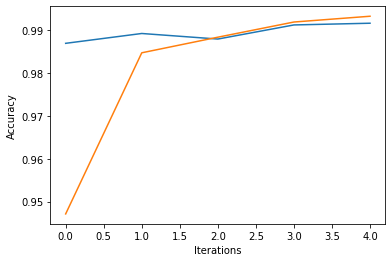

In [14]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

Loss

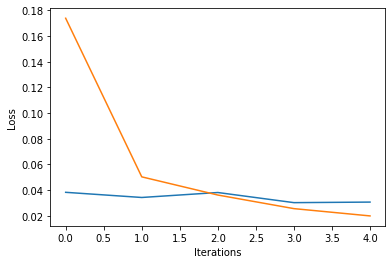

In [15]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()